## This notebook does some toy MC study to check what is the impact of resolution on azimuthal asymmetries. It generates a distribution that follows a sin function and then adds some gaussian noise. The decrease in height of the sin function is an estimate of the "dilution factor"

In [1]:
from scipy.stats import cosine, norm, uniform
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
pseudodata = cosine(np.pi/2.0).rvs(size=100000) #sin
#pseudodata = cosine(np.pi/2.0).rvs(size=100000) #sin

pedestal = uniform(-np.pi/2.0, 2.0*np.pi).rvs(size=10000) #sin

smear = norm(0,0.3).rvs(size=100000)

(array([ 176.,  732., 1635., 2925., 4370., 5845., 7475., 8474., 9478.,
        9787., 9704., 9270., 8307., 6994., 5618., 4298., 2743., 1477.,
         594.,   98.]),
 array([-1.49136976, -1.18244848, -0.87352719, -0.5646059 , -0.25568461,
         0.05323668,  0.36215797,  0.67107926,  0.98000055,  1.28892183,
         1.59784312,  1.90676441,  2.2156857 ,  2.52460699,  2.83352828,
         3.14244957,  3.45137086,  3.76029214,  4.06921343,  4.37813472,
         4.68705601]),
 <a list of 1 Patch objects>)

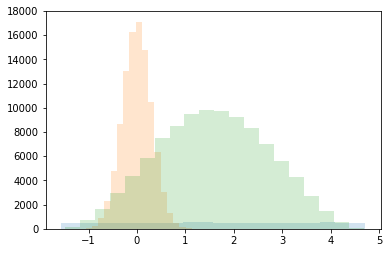

In [3]:
plt.hist(pedestal, histtype='stepfilled', alpha=0.2,bins=20)

plt.hist(smear, histtype='stepfilled', alpha=0.2,bins=20)
plt.hist(pseudodata, histtype='stepfilled', alpha=0.2,bins=20)

[1.50906344 1.08056297 0.99838057 0.98450686 0.9744445  0.97854632
 0.98548501 1.00335405 1.04785714 1.58742331]


(0.0, 20428.75)

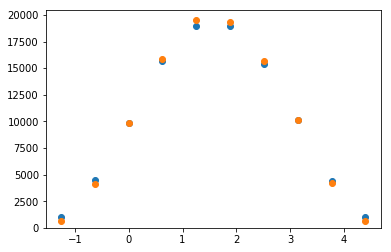

In [4]:
smeared,x = np.histogram(pseudodata+smear,bins=10,range=(-np.pi/2.0, 1.5*np.pi))
truth,x = np.histogram(pseudodata, bins=10,range=(-np.pi/2.0, 1.5*np.pi))

#ped,x = np.histogram(pedestal, bins=20,range=(-np.pi/2.0, 1.5*np.pi))

#smeared = smeared+ped
#truth = truth+ped
x = (x[1:]+x[:-1])/2


plt.plot(x,smeared,'o',label='smeared')
plt.plot(x,truth,'o',label='truth')

print np.true_divide(smeared,truth)
plt.ylim(bottom=0.0)

(0.9, 1.1)

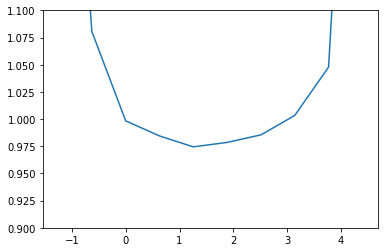

In [7]:
plt.plot(x, np.true_divide(smeared,truth))
plt.ylim([0.9,1.1])

ValueError: operands could not be broadcast together with shapes (10000,) (100000,) 

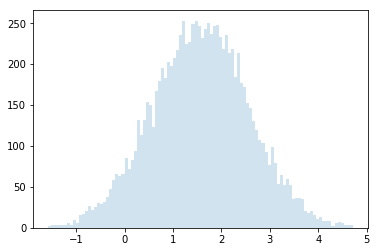

In [5]:
#pedestal = uniform(np.pi/2.0).rvs(size=1000) #sin
pseudodata = norm(np.pi/2.0,1.0).rvs(size=10000) #sin

plt.hist(pseudodata, histtype='stepfilled', alpha=0.2,bins=100,range=(-np.pi/2.0, 1.5*np.pi))
plt.hist(pseudodata+smear, histtype='stepfilled', alpha=0.2,bins=100,range=(-np.pi/2.0, 1.5*np.pi))